### STEP-1 LOAD AND EXPLORE THE DATA

#### 1.1 importing the libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

#### 1.2 Loading the Data

In [7]:
df = pd.read_csv("C:/Users/Harshit/Downloads/IRIS.csv")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


#### 1.3 Understanding the dataset structure

In [14]:
print("Dataset_shape: ", df.shape)

Dataset_shape:  (150, 5)


In [18]:
print("Dataset_Info" , df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Dataset_Info None


In [20]:
print("Dataset_Describe",df.describe())

Dataset_Describe        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


#### 1.4 checking for thr missing value

In [27]:
print("MISSING_VALUES\n" ,df.isnull().sum())

MISSING_VALUES
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


#### 1.5 check class Distribution(Target vriables)

In [30]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [48]:
print("Column_Dtypes",df.dtypes)

Column_Dtypes sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


### STEP-2 DATA VISUALIZATION

#### 2.1 Pair plot

C:\Users\Harshit\anaconda3\anaconda_setup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshit\anaconda3\anaconda_setup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshit\anaconda3\anaconda_setup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harshit\anaconda3\anaconda_setup\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

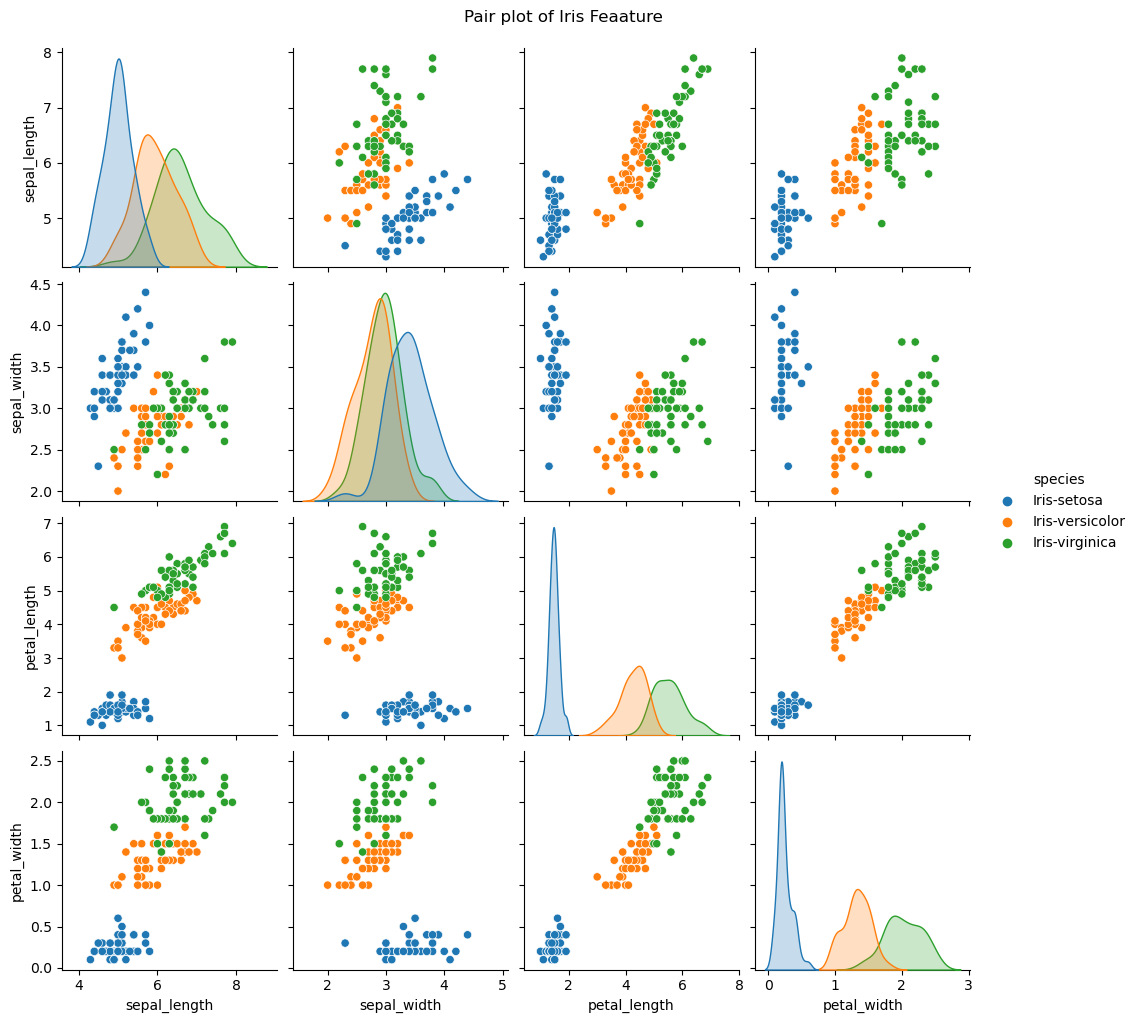

In [43]:
sns.pairplot(df,hue='species')
plt.suptitle("Pair plot of Iris Feaature", y = 1.02)
plt.show()

#### 2.2 corelation Heatmap

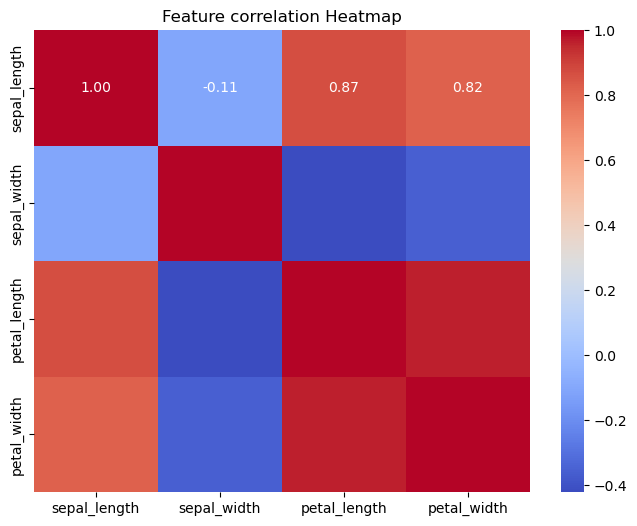

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('species',axis = 1).corr(), annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature correlation Heatmap")
plt.show()

#### 2.3 Boxplot for feature Distribution

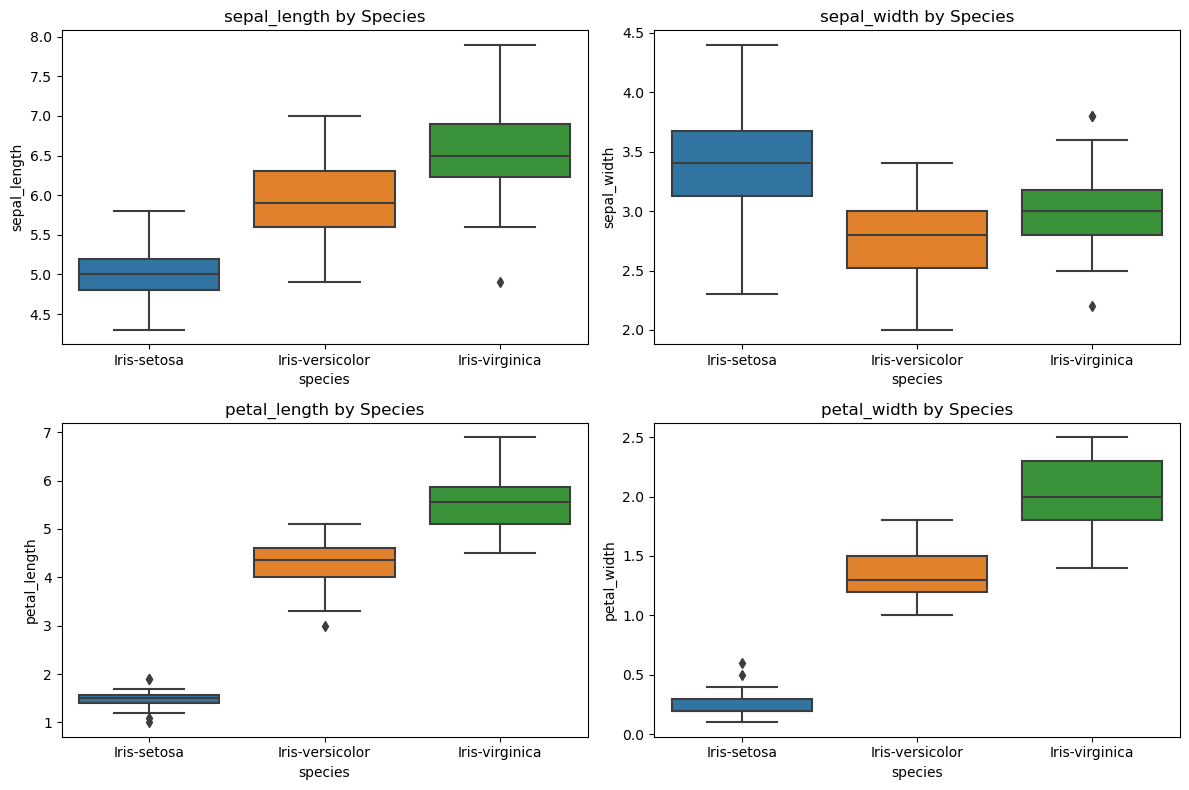

In [66]:
plt.figure(figsize=(12,8))
for idx, feature in enumerate(df.columns[:-1]):
    plt.subplot(2,2,idx+1)
    sns.boxplot(x='species', y=feature,data=df)
    plt.title(f"{feature} by Species")
plt.tight_layout()
plt.show()

### STEP-3 FEATURE IMPORTANCE AND PREPARING DATA

#### 3.1 split features and target

In [70]:
x= df.drop('species',axis = 1)
y=df['species']

In [78]:
print("After droping column species\n:", x.head(10))

After droping column species
:    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
5           5.4          3.9           1.7          0.4
6           4.6          3.4           1.4          0.3
7           5.0          3.4           1.5          0.2
8           4.4          2.9           1.4          0.2
9           4.9          3.1           1.5          0.1


#### 3.2 Encode the target(species)

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Encoding:\n",label_mapping)

Label Encoding:
 {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


#### 3.3 Random Forest

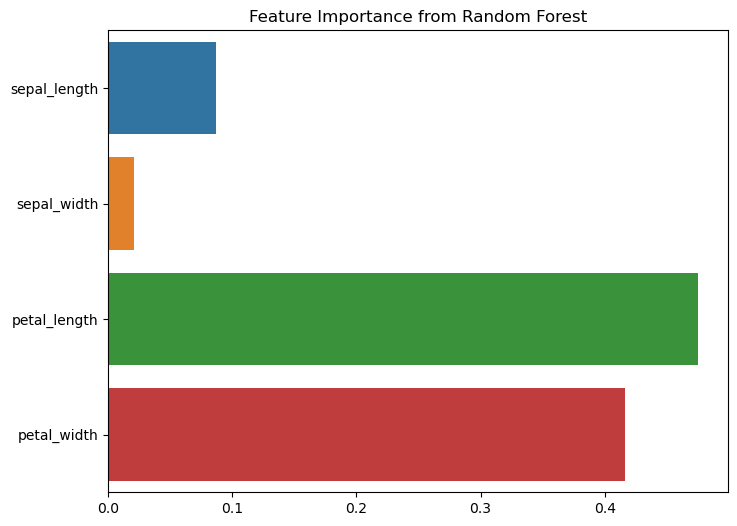

In [94]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x,y_encoded)

importances = model.feature_importances_

plt.figure(figsize=(8,6))
sns.barplot(x = importances , y=x.columns)
plt.title("Feature Importance from Random Forest")
plt.show()

### STEP-4 TRAIN-TEST SPLIT

In [97]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y_encoded,test_size = 0.2,random_state=42)

### STEP-5 TRAIN AND EVALUATE MULTIPLE MODELS

#### 5.1 We will try different models ()
#### -Logistic Regression

#### -K-Nearest Neighbors (KNN)

#### -Decision Tree

#### -Random Forest

#### -Support Vector Machine (SVM)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### 5.2 train and evaluate Model

In [121]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}
for name, Model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    print(f"\n===== {name} ====")
    print("Accuracy:",accuracy_score(y_test, predictions))
    print("confusion Matrix:\n", confusion_matrix(y_test, predictions))
    print("Classification Report:\n",classification_report(y_test, predictions,target_names=le.classes_))


===== Logistic Regression ====
Accuracy: 1.0
confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


===== KNN ====
Accuracy: 1.0
confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg   

#### 5.3 Saving Trained model

In [130]:
import joblib
joblib.dump(model, 'iris_classifier.pkl')
print("Model saved successfully")

Model saved successfully
